In [41]:
import seaborn as sns
# this cell must be executed AFTER all the others, so that the variables are already set!
display(Markdown("""
# COVID-19 statistics in Italy
## Last Updated: {last_date}
This is a basic analysis of the spread of the COVID-19 Coronavirus disease in Italy.

Data is sourced from the [github repo](https://github.com/pcm-dpc/COVID-19) of the Italian Civil Protection Department, which is updated on a daily basis.

Below are provided graphs, with regional breakdown, of the following parameters:
- TotalPositiveCases
- TotalHospitalizedPatients
- Deaths
- TestsPerformed

as well as two maps showing the geolocation of the cases at both regional and provincial level.

Here follow two lists:
- Italian regions in descending order of cases
- top 20 provinces in descending order of cases
""".format(last_date=last_date)))
cm = sns.light_palette("red", as_cmap=True)
italy_region_cluster.sort_values(by='TotalPositiveCases', ascending=False)[['RegionName', 'TotalPositiveCases']].style.background_gradient(cmap=cm).hide_index()


# COVID-19 statistics in Italy
## Last Updated: 2020-03-18 17:00:00
This is a basic analysis of the spread of the COVID-19 Coronavirus disease in Italy.

Data is sourced from the [github repo](https://github.com/pcm-dpc/COVID-19) of the Italian Civil Protection Department, which is updated on a daily basis.

Below are provided graphs, with regional breakdown, of the following parameters:
- TotalPositiveCases
- TotalHospitalizedPatients
- Deaths
- TestsPerformed

as well as two maps showing the geolocation of the cases at both regional and provincial level.

Here follow two lists:
- Italian regions in descending order of cases
- top 20 provinces in descending order of cases


RegionName,TotalPositiveCases
Lombardia,17713
Emilia Romagna,4525
Veneto,3214
Piemonte,2341
Marche,1568
Toscana,1330
Liguria,887
Lazio,724
Friuli Venezia Giulia,462
Campania,460


In [42]:
italy_province_cluster.sort_values(by='TotalPositiveCases', ascending=False)[['RegionName', 'ProvinceName', 'TotalPositiveCases']][:20].style.background_gradient(cmap=cm).hide_index()

RegionName,ProvinceName,TotalPositiveCases
Lombardia,Bergamo,4305
Lombardia,Brescia,3784
Lombardia,Milano,2644
Lombardia,Cremona,2167
Lombardia,Lodi,1445
Emilia Romagna,Piacenza,1340
Piemonte,Torino,1042
Lombardia,Pavia,978
Marche,Pesaro e Urbino,910
Veneto,Padova,882


In [27]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from IPython.display import Markdown
import folium
# may require pip install folium
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [28]:
DATA_FILES_DIR = './data/'
OUTPUT_CHARTS_DIR = './charts/'

if not os.path.exists(DATA_FILES_DIR):
    print(f'ERROR: cannot find dir {DATA_FILES_DIR}')
if not os.path.exists(OUTPUT_CHARTS_DIR):
    os.makedirs(OUTPUT_CHARTS_DIR)

In [29]:
italy_region_data_cols = ['data', 'denominazione_regione', 'totale_ospedalizzati', 'totale_casi', 'deceduti', 'tamponi']      

italy_region = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv", 
                           usecols=italy_region_data_cols)
italy_region = italy_region.rename(columns={'data': 'Date', 'denominazione_regione': 'RegionName', 
                                            'totale_ospedalizzati': 'TotalHospitalizedPatients',
                                            'totale_casi': 'TotalPositiveCases', 'deceduti': 'Deaths', 
                                            'tamponi': 'TestsPerformed'})
italy_region['Date']= pd.to_datetime(italy_region['Date'])

In [30]:
first_date = italy_region['Date'].min()
last_date = italy_region['Date'].max()
print(f"Dates: {first_date} - {last_date}")
print(f'{italy_region.shape} samples, attributes')
italy_region.describe().T

Dates: 2020-02-24 18:00:00 - 2020-03-18 17:00:00
(504, 6) samples, attributes


,count,mean,std,min,25%,50%,75%,max
TotalHospitalizedPatients,504.0,235.585317,858.678443,0.0,2.0,12.0,97.00,8209.0
Deaths,504.0,32.547619,163.704146,0.0,0.0,0.0,6.00,1959.0
TotalPositiveCases,504.0,476.882937,1723.058319,0.0,3.0,33.0,237.75,17713.0
TestsPerformed,504.0,2752.496032,6699.668454,0.0,75.0,397.5,1973.00,48983.0


In [31]:
# RegionName is irrelevant for the max statistics
italy_region[filter(lambda col : col != 'RegionName', italy_region.columns)].max()

Date                         2020-03-18 17:00:00
TotalHospitalizedPatients                   8209
Deaths                                      1959
TotalPositiveCases                         17713
TestsPerformed                             48983
dtype: object

In [32]:
display(Markdown("""
### Legend order
We want the legend to follow the descending order of the particular stat that we are charting (at {last_date}). 
""".format(last_date=last_date)))


### Legend order
We want the legend to follow the descending order of the particular stat that we are charting (at 2020-03-18 17:00:00). 


In [33]:
# this is the order that we want for the stat TotalPositiveCases
italy_region[italy_region['Date']==last_date].sort_values(by='TotalPositiveCases', ascending=False)['RegionName']

492                Lombardia
488           Emilia Romagna
503                   Veneto
495                 Piemonte
493                   Marche
499                  Toscana
491                  Liguria
490                    Lazio
489    Friuli Venezia Giulia
487                 Campania
500              P.A. Trento
496                   Puglia
485             P.A. Bolzano
498                  Sicilia
483                  Abruzzo
501                   Umbria
502            Valle d'Aosta
497                 Sardegna
486                 Calabria
494                   Molise
484               Basilicata
Name: RegionName, dtype: object

# Statistics per region

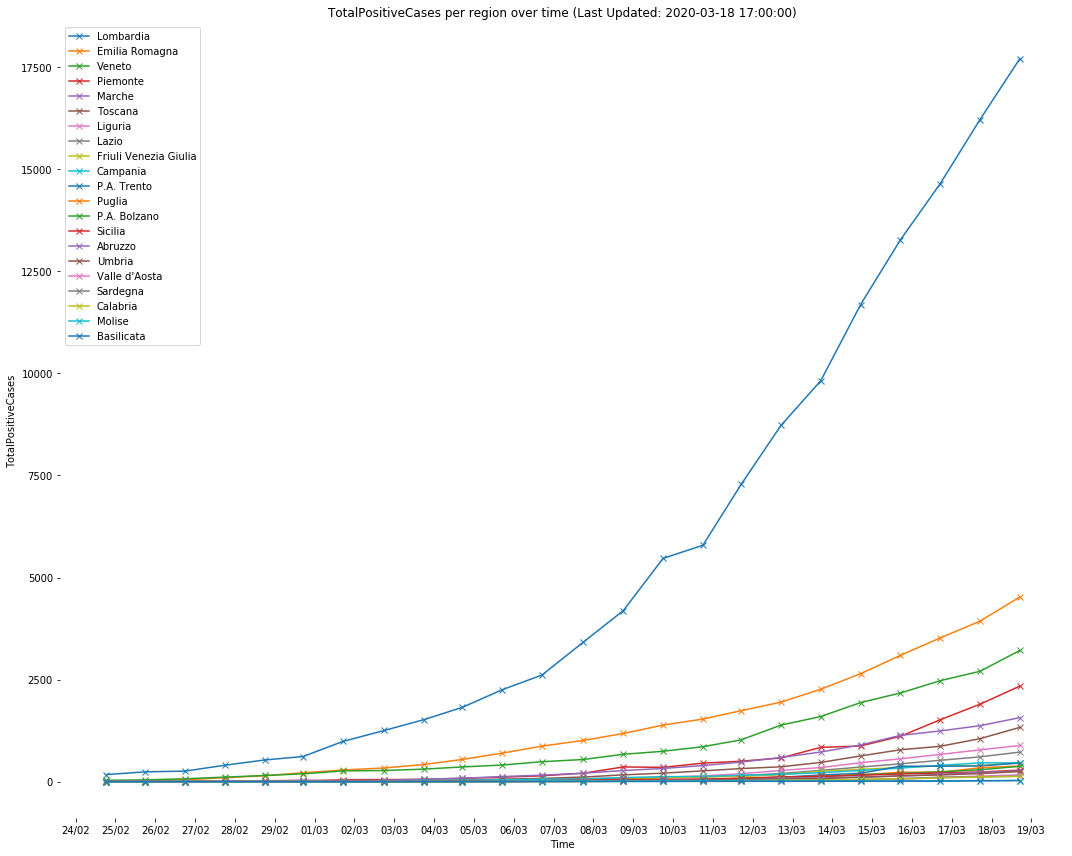

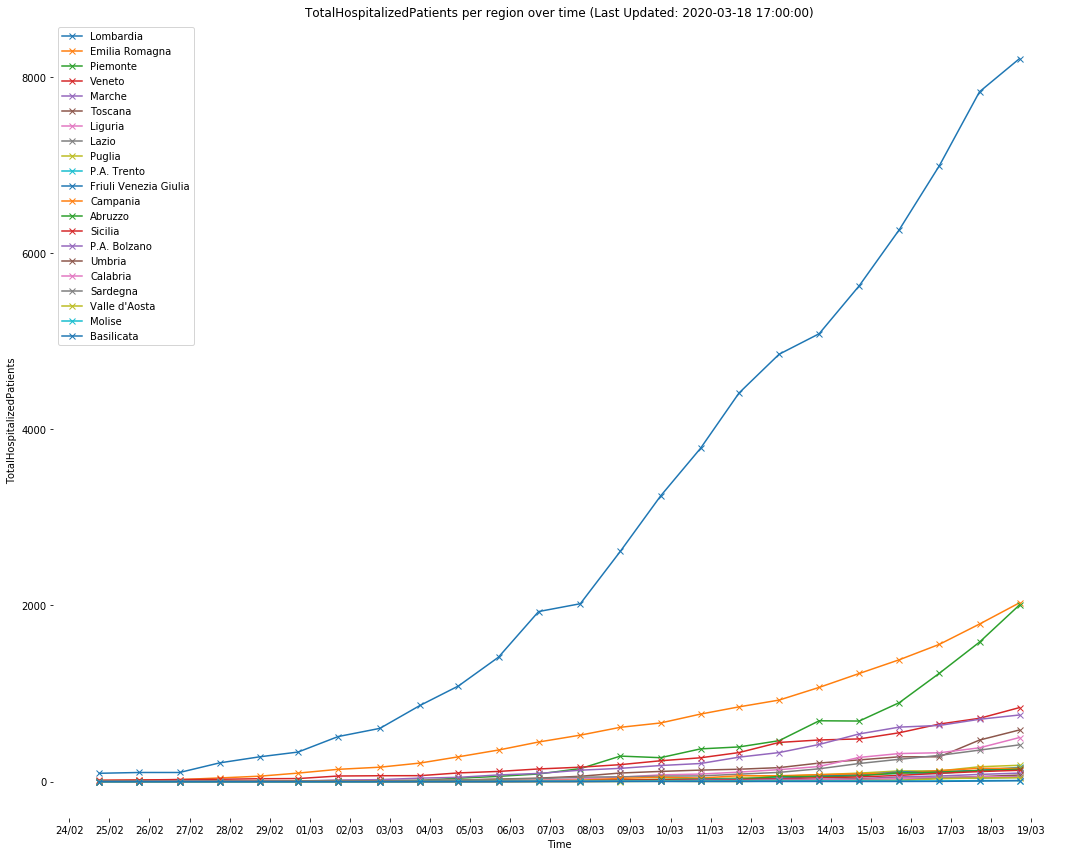

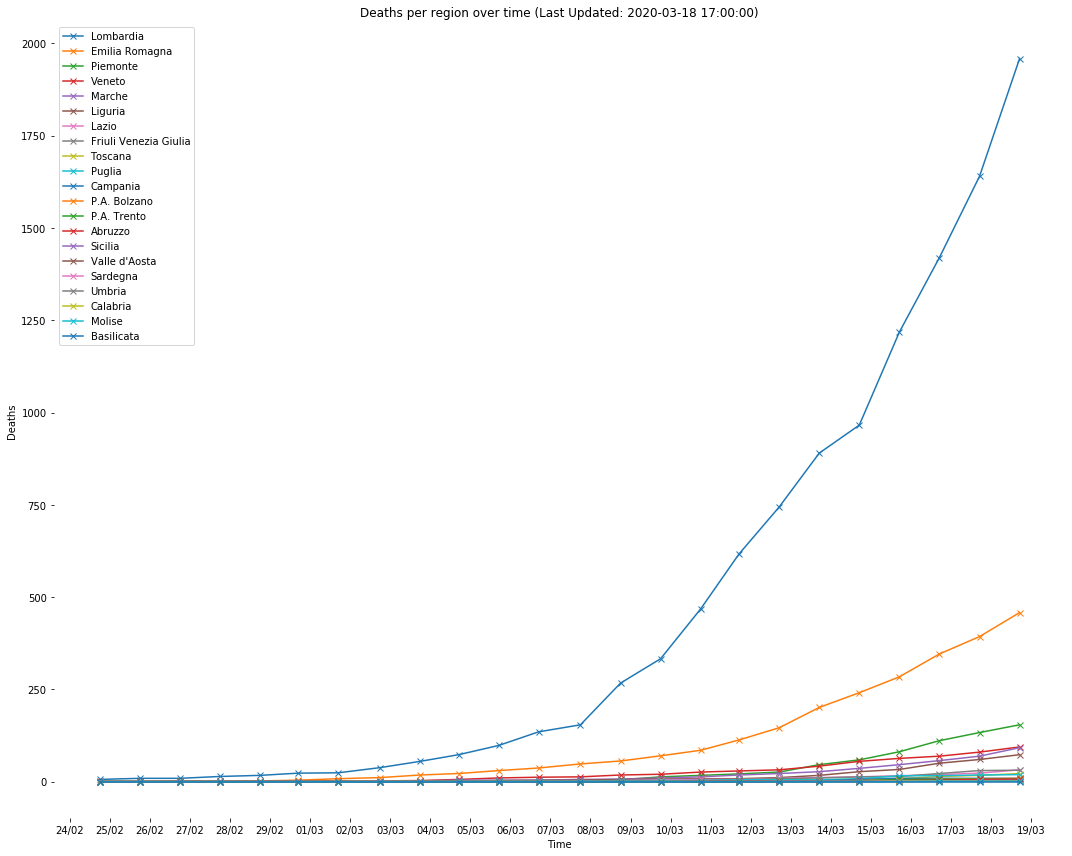

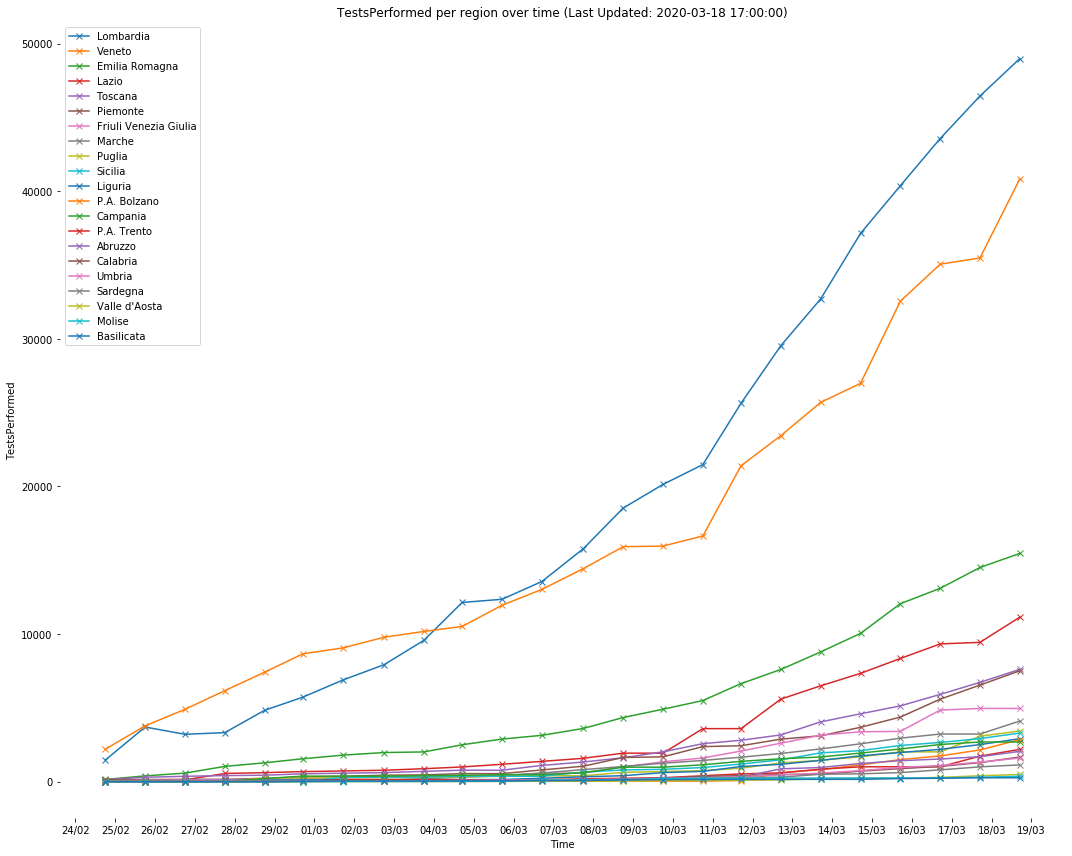

In [34]:
for stat in ['TotalPositiveCases', 'TotalHospitalizedPatients', 'Deaths', 'TestsPerformed']:
    plt.figure(figsize=(15, 12))
    for region in italy_region[italy_region['Date']==last_date].sort_values(by=stat, ascending=False)['RegionName']:
        plt.plot(italy_region[italy_region['RegionName'] == region]['Date'], 
                 italy_region[italy_region['RegionName'] == region][stat],
                 label=region,
                 marker='x')
    plt.xlabel('Time')
    plt.ylabel(f'{stat}')
    plt.title(f'{stat} per region over time (Last Updated: {last_date})')
    plt.legend()
    plt.box(False)
    plt.tight_layout()
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
    plt.savefig(f'{OUTPUT_CHARTS_DIR}ita_region_{stat}.png', dpi=300)

In [35]:
italy_region_cluster_cols = ['data', 'denominazione_regione', 'totale_casi', 'lat', 'long']     

italy_region_cluster = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv", 
                                   usecols=italy_region_cluster_cols)
italy_region_cluster = italy_region_cluster.rename(columns={'data': 'Date', 'denominazione_regione': 'RegionName', 
                                            'totale_casi': 'TotalPositiveCases', 
                                            'lat': 'Latitude', 
                                            'long': 'Longitude'})
italy_region_cluster['Date'] = pd.to_datetime(italy_region_cluster['Date'])
italy_region_cluster = italy_region_cluster[italy_region_cluster['Date']==last_date]

# Regional geolocation

In [36]:
italy_map = folium.Map(location=[42.8719, 12.5674], zoom_start=5, tiles='Stamen Toner')

for region, lat, lon, count in zip(italy_region_cluster['RegionName'], italy_region_cluster['Latitude'], 
                                   italy_region_cluster['Longitude'], italy_region_cluster['TotalPositiveCases']):
    folium.CircleMarker([lat, lon],
                        radius=count/350,
                        color='red',
                        popup=f'RegionName: {region}<br>TotalPositiveCases: {count}<br>',
                        fill_color='red',
                        fill_opacity=0.7).add_to(italy_map)

italy_map

In [37]:
italy_province_cluster_cols = ['data', 'denominazione_regione', 'denominazione_provincia', 'totale_casi', 'lat', 'long']      

italy_province_cluster = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv", 
                                     usecols=italy_province_cluster_cols)
italy_province_cluster = italy_province_cluster.rename(columns={'data': 'Date', 'denominazione_regione': 'RegionName',
                                            'denominazione_provincia': 'ProvinceName',
                                            'totale_casi': 'TotalPositiveCases', 
                                            'lat': 'Latitude', 
                                            'long': 'Longitude'})
italy_province_cluster['Date'] = pd.to_datetime(italy_province_cluster['Date'])

# Statistics per province (only top 10 provinces per TotalPositiveCases)

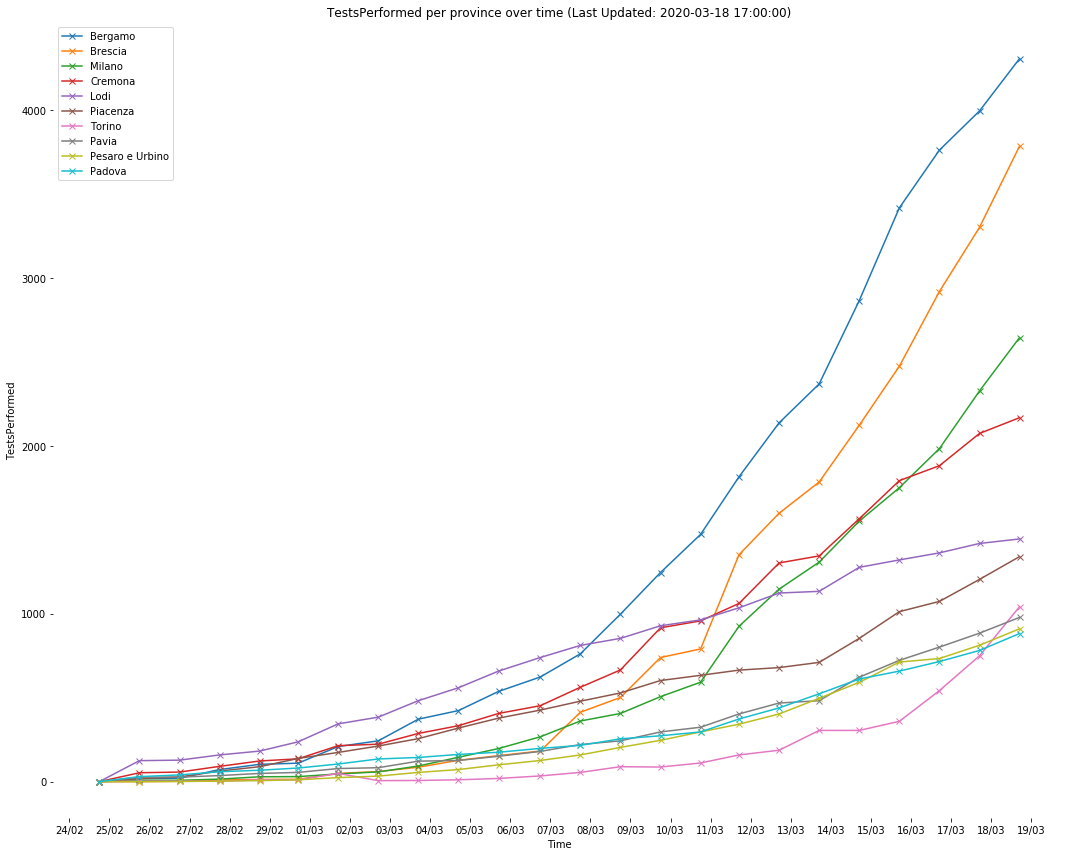

In [38]:
plt.figure(figsize=(15, 12))
for province in italy_province_cluster[italy_province_cluster['Date']==last_date].sort_values(by='TotalPositiveCases', ascending=False)['ProvinceName'][:10]:
    plt.plot(italy_province_cluster[italy_province_cluster['ProvinceName'] == province]['Date'], 
             italy_province_cluster[italy_province_cluster['ProvinceName'] == province]['TotalPositiveCases'],
             label=province,
             marker='x')
plt.xlabel('Time')
plt.ylabel(f'{stat}')
plt.title(f'{stat} per province over time (Last Updated: {last_date})')
plt.legend()
plt.box(False)
plt.tight_layout()
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
plt.savefig(f'{OUTPUT_CHARTS_DIR}ita_province_TotalPositiveCases.png', dpi=300)

In [39]:
italy_province_cluster = italy_province_cluster[(italy_province_cluster['Date']==last_date) & 
                                                 (italy_province_cluster['Latitude']!=0.0) &
                                                 (italy_province_cluster['TotalPositiveCases']!=0.0)]

# Provincial geolocation

In [40]:
italy_map = folium.Map(location=[42.8719, 12.5674], zoom_start=5, tiles='Stamen Toner')

for region, province, lat, lon, count in zip(italy_province_cluster['RegionName'], 
                                             italy_province_cluster['ProvinceName'],
                                             italy_province_cluster['Latitude'], 
                                             italy_province_cluster['Longitude'], 
                                             italy_province_cluster['TotalPositiveCases']):
    folium.CircleMarker([lat, lon],
                        radius=count/200,
                        color='red',
                        popup=f'RegionName: {region}<br>ProvinceName: {province}<br>TotalPositiveCases: {count}<br>',
                        fill_color='red',
                        fill_opacity=0.7).add_to(italy_map)

italy_map